Loading The Data

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
df=pd.read_csv("/content/drive/MyDrive/Dataset/talking_data.csv")

Exploring The Data

In [3]:
#checking Head of Data
df.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
0,87540,12,1,13,497,2017-11-07 09:30:38,NaN,0
1,105560,25,1,17,259,2017-11-07 13:40:27,NaN,0
2,101424,12,1,19,212,2017-11-07 18:05:24,NaN,0
3,94584,13,1,13,477,2017-11-07 04:58:08,NaN,0
4,68413,12,1,1,178,2017-11-09 09:00:09,NaN,0


In [4]:
#checking Rows and Columns of Data
print("This TalkingData Has {} Rows and {} Columns".format(df.shape[0],df.shape[1]))

This TalkingData Has 100000 Rows and 8 Columns


In [5]:
#checking Datatypes of Features
df.dtypes

ip                  int64
app                 int64
device              int64
os                  int64
channel             int64
click_time         object
attributed_time    object
is_attributed       int64
dtype: object

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ip,100000.0,91255.87967,69835.553661,9.0,40552.0,79827.0,118252.0,364757.0
app,100000.0,12.04788,14.941500,1.0,3.0,12.0,15.0,551.0
device,100000.0,21.77125,259.667767,0.0,1.0,1.0,1.0,3867.0
os,100000.0,22.81828,55.943136,0.0,13.0,18.0,19.0,866.0
channel,100000.0,268.83246,129.724248,3.0,145.0,258.0,379.0,498.0
is_attributed,100000.0,0.00227,0.047591,0.0,0.0,0.0,0.0,1.0


Checking For Missing Value

In [7]:
miss_val=df.isna().sum()
miss_val

ip                     0
app                    0
device                 0
os                     0
channel                0
click_time             0
attributed_time    99773
is_attributed          0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   ip               100000 non-null  int64 
 1   app              100000 non-null  int64 
 2   device           100000 non-null  int64 
 3   os               100000 non-null  int64 
 4   channel          100000 non-null  int64 
 5   click_time       100000 non-null  object
 6   attributed_time  227 non-null     object
 7   is_attributed    100000 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 6.1+ MB


In [9]:
cols=['ip', 'app', 'device', 'os', 'channel', 'click_time', 'attributed_time','is_attributed']
for col in cols:
  unique=len(df[col].unique())
  print('Columns',"       ","Unique Values")
  print(col,"             ",unique)

Columns         Unique Values
ip               34857
Columns         Unique Values
app               161
Columns         Unique Values
device               100
Columns         Unique Values
os               130
Columns         Unique Values
channel               161
Columns         Unique Values
click_time               80350
Columns         Unique Values
attributed_time               228
Columns         Unique Values
is_attributed               2


In [10]:
df['app']

0        12
1        25
2        12
3        13
4        12
         ..
99995    11
99996     9
99997     3
99998    15
99999    14
Name: app, Length: 100000, dtype: int64

In [11]:
app_id=df['app'].value_counts()
print(app_id)
total_sum=app_id.sum()
print("Total Click on Apps",total_sum)

length=len(app_id)
print("Total App ID: ",length)
uaid=df["app"].unique()
print("Total Unique Id of Apps",uaid)

3      18279
12     13198
2      11737
9       8992
15      8595
       ...  
407        1
145        1
271        1
398        1
92         1
Name: app, Length: 161, dtype: int64
Total Click on Apps 100000
Total App ID:  161
Total Unique Id of Apps [ 12  25  13   3   1   9   2   6  20  14  64   7  15  18  11   8  23  21
  56  28  36  22  26  17  27  10  60  58  19  32  24   4  53 125 204   5
 202  70  47  29  55 103  35  83 208 146 161  46  62  65 110  42 150 266
 151 148  72 310  93  94  71  43  39 170  37  68  54 107 398 160  30 183
 315  45 121  38  82 134  33 233 100  44 109  59  74  61 104  66  67 273
 192  50 118 372  48 232 165  91 123  88 538  49  16 105 536 216 425 117
 551  99  86 101 394  78  95 181  76  34 124 548 108  85 145  79  97  75
  52 215  84  96  81 139 267  80 137 119 474 158 293 122 112 149 363 271
  31 171  87 168 176 347 163 190 486 133 302 268 407 116  92 115 261]


In [12]:
#20% of Total Clicks
limit=(total_sum)*0.02
x=app_id.values
greater=[]
less=[]
#print(x)
for i in range(161):
  #print(x[i])
  if x[i]>limit:
    y=uaid[i]
    greater.append(y)
  else:
    y=uaid[i]
    less.append(y) 


print()
print("frequently used apps id: ",greater)
print("App Id Less Frequently Used:",less)   


frequently used apps id:  [12, 25, 13, 3, 1, 9, 2, 6, 20, 14]
App Id Less Frequently Used: [64, 7, 15, 18, 11, 8, 23, 21, 56, 28, 36, 22, 26, 17, 27, 10, 60, 58, 19, 32, 24, 4, 53, 125, 204, 5, 202, 70, 47, 29, 55, 103, 35, 83, 208, 146, 161, 46, 62, 65, 110, 42, 150, 266, 151, 148, 72, 310, 93, 94, 71, 43, 39, 170, 37, 68, 54, 107, 398, 160, 30, 183, 315, 45, 121, 38, 82, 134, 33, 233, 100, 44, 109, 59, 74, 61, 104, 66, 67, 273, 192, 50, 118, 372, 48, 232, 165, 91, 123, 88, 538, 49, 16, 105, 536, 216, 425, 117, 551, 99, 86, 101, 394, 78, 95, 181, 76, 34, 124, 548, 108, 85, 145, 79, 97, 75, 52, 215, 84, 96, 81, 139, 267, 80, 137, 119, 474, 158, 293, 122, 112, 149, 363, 271, 31, 171, 87, 168, 176, 347, 163, 190, 486, 133, 302, 268, 407, 116, 92, 115, 261]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


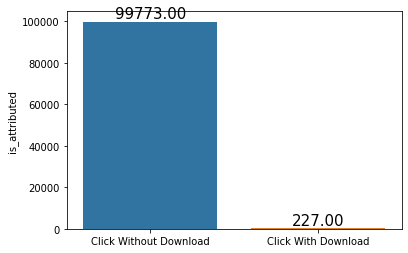

In [13]:
download_rate=df['is_attributed'].value_counts()
ax=sns.barplot(['Click Without Download',"Click With Download"],download_rate)
for bar in ax.patches:
  ax.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.show()



4. By using Pandas derive new features such as - 'day_of_week' , 'day_of_year' , 'month' , and 'hour' as                  float/int datatypes using the 'click_time' column . Add the newly derived columns in original dataset.

In [14]:
from datetime import datetime
df.click_time=pd.to_datetime(df.click_time)
df.info()
df['month']=pd.DatetimeIndex(df['click_time']).month
df['day_of_Year']=pd.DatetimeIndex(df['click_time']).dayofyear
df['day_of_week']=pd.DatetimeIndex(df['click_time']).dayofweek
df['Hour']=pd.DatetimeIndex(df['click_time']).hour
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   ip               100000 non-null  int64         
 1   app              100000 non-null  int64         
 2   device           100000 non-null  int64         
 3   os               100000 non-null  int64         
 4   channel          100000 non-null  int64         
 5   click_time       100000 non-null  datetime64[ns]
 6   attributed_time  227 non-null     object        
 7   is_attributed    100000 non-null  int64         
dtypes: datetime64[ns](1), int64(6), object(1)
memory usage: 6.1+ MB


,ip,app,device,os,channel,click_time,attributed_time,is_attributed,month,day_of_Year,day_of_week,Hour
0,87540,12,1,13,497,2017-11-07 09:30:38,NaN,0,11,311,1,9
1,105560,25,1,17,259,2017-11-07 13:40:27,NaN,0,11,311,1,13
2,101424,12,1,19,212,2017-11-07 18:05:24,NaN,0,11,311,1,18
3,94584,13,1,13,477,2017-11-07 04:58:08,NaN,0,11,311,1,4
4,68413,12,1,1,178,2017-11-09 09:00:09,NaN,0,11,313,3,9
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,124883,11,1,19,122,2017-11-09 13:25:41,NaN,0,11,313,3,13
99996,85150,9,1,13,244,2017-11-07 11:25:43,NaN,0,11,311,1,11
99997,18839,3,1,13,19,2017-11-08 11:38:42,NaN,0,11,312,2,11
99998,114276,15,1,12,245,2017-11-08 17:55:21,NaN,0,11,312,2,17


In [15]:
df['attributed_time']=df['attributed_time'].fillna(0)
df.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed,month,day_of_Year,day_of_week,Hour
0,87540,12,1,13,497,2017-11-07 09:30:38,0,0,11,311,1,9
1,105560,25,1,17,259,2017-11-07 13:40:27,0,0,11,311,1,13
2,101424,12,1,19,212,2017-11-07 18:05:24,0,0,11,311,1,18
3,94584,13,1,13,477,2017-11-07 04:58:08,0,0,11,311,1,4
4,68413,12,1,1,178,2017-11-09 09:00:09,0,0,11,313,3,9


In [16]:
df=df.drop(['click_time','attributed_time'],axis=1)
df.head()

,ip,app,device,os,channel,is_attributed,month,day_of_Year,day_of_week,Hour
0,87540,12,1,13,497,0,11,311,1,9
1,105560,25,1,17,259,0,11,311,1,13
2,101424,12,1,19,212,0,11,311,1,18
3,94584,13,1,13,477,0,11,311,1,4
4,68413,12,1,1,178,0,11,313,3,9


In [17]:
X=df.drop(['is_attributed'],axis=1)
y=df.loc[:,'is_attributed']

print("The X has {} Rows and {} Features".format(X.shape[0],X.shape[1]))
print("The y has {} Rows ".format(y.shape[0]))

The X has 100000 Rows and 9 Features
The y has 100000 Rows 


In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=2)
print("X_train has {} Rows and {} Columns".format(X_train.shape[0],X_train.shape[1]))
print("X_train has {} Rows".format(y_train.shape[0]))
print("X_train has {} Rows and {} Columns".format(X_test.shape[0],X_test.shape[1]))
print("X_train has {} Rows".format(y_test.shape[0]))


X_train has 80000 Rows and 9 Columns
X_train has 80000 Rows
X_train has 20000 Rows and 9 Columns
X_train has 20000 Rows


In [19]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [20]:
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn import metrics

model=XGBClassifier()
model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [21]:
y_pred=model.predict_proba(X_test)
y_pred

array([[9.9959111e-01, 4.0890000e-04],
       [9.9968415e-01, 3.1581876e-04],
       [9.9956739e-01, 4.3259186e-04],
       ...,
       [9.9974930e-01, 2.5067982e-04],
       [9.9910307e-01, 8.9690811e-04],
       [9.9959111e-01, 4.0890000e-04]], dtype=float32)

In [22]:
roc=metrics.roc_auc_score(y_test,y_pred[:,1])
print("AUC: %.2f%%" % (roc * 100.0))

AUC: 98.58%


In [23]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


Hyperparameter Tuning 

In [24]:
#Creating a Kfold object
folds=3

#specify range of hyperparameters
param_grid= {"learning_rate": [0.2,0.6],
             'subsample':[0.3,0.6,0.9]}
#model
xgb_model=XGBClassifier(max_depth=2,n_estimators=200)

#set up grid search
model_cv=GridSearchCV(estimator=xgb_model,
                      param_grid=param_grid,
                      scoring='roc_auc',
                      cv=folds,
                      verbose=1,
                      return_train_score=True)


In [25]:
model_cv.fit(X_train,y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:  1.3min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=2, min_child_weight=1,
                                     missing=None, n_estimators=200, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             pre_dispatch='2*n_jobs', refit=True, return_train_scor

In [26]:
cv_results=pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,4.024832,0.028288,0.140109,0.001905,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.945377,0.952509,0.941346,0.946411,0.004616,5,0.990861,0.985355,0.984889,0.987035,0.002712
1,4.394483,0.005190,0.134639,0.002440,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.951977,0.956603,0.936193,0.948257,0.008738,4,0.990747,0.987841,0.987660,0.988750,0.001414
2,3.799831,0.004446,0.128864,0.002775,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.956663,0.956038,0.942028,0.951576,0.006756,1,0.988866,0.988868,0.986709,0.988148,0.001018
3,3.978752,0.011879,0.138198,0.001817,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.940081,0.953658,0.907360,0.933700,0.019432,6,0.997564,0.992629,0.994287,0.994827,0.002051
4,4.438320,0.003118,0.138965,0.002066,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.963073,0.947338,0.935051,0.948488,0.011469,3,0.998015,0.997465,0.998799,0.998093,0.000547
5,3.806243,0.012046,0.138099,0.005089,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.950713,0.953654,0.946487,0.950285,0.002942,2,0.997699,0.998321,0.998749,0.998256,0.000431


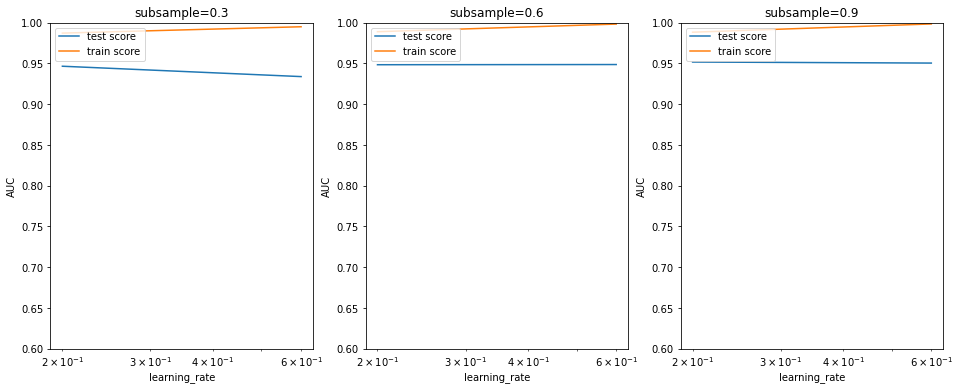

In [27]:
#plotting
plt.figure(figsize=(16,6))
param_grid={'learning_rate':[0.2,0.6],
            'subsample':[0.3,0.6,0.9]}

for n, subsample in enumerate(param_grid['subsample']):

  plt.subplot(1,len(param_grid['subsample']),n+1)
  df=cv_results[cv_results['param_subsample']==subsample]

  plt.plot(df['param_learning_rate'],df['mean_test_score'])
  plt.plot(df['param_learning_rate'],df["mean_train_score"])
  plt.xlabel('learning_rate')
  plt.ylabel("AUC")
  plt.title("subsample={0}".format(subsample))
  plt.ylim([0.60,1])
  plt.legend(['test score','train score'],loc='upper left')
  plt.xscale('log')

In [28]:
params={'learning_rate':0.2,
        'max_depth':2,
        'n_estimators':200,
        'subsample':0.6,
        'objective':'binary:logistic'}

model=XGBClassifier(params=params)
model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic',
              params={'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.6},
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=1, verbosity=1)

In [29]:
y_pred=model.predict_proba(X_test)
y_pred[:10]

array([[9.9959111e-01, 4.0890000e-04],
       [9.9968415e-01, 3.1581876e-04],
       [9.9956739e-01, 4.3259186e-04],
       [9.9965423e-01, 3.4577594e-04],
       [9.9939561e-01, 6.0440460e-04],
       [9.9952662e-01, 4.7337802e-04],
       [9.9966019e-01, 3.3979691e-04],
       [9.9984896e-01, 1.5103171e-04],
       [9.9985605e-01, 1.4397143e-04],
       [9.9966538e-01, 3.3461687e-04]], dtype=float32)

In [30]:
#roc Auc
auc=metrics.roc_auc_score(y_test,y_pred[:,1])
auc

0.9858052841114731

In [31]:
#feature importance
importance= dict(zip(X_train.columns,model.feature_importances_))
importance

{'Hour': 0.04800737,
 'app': 0.25292116,
 'channel': 0.25704932,
 'day_of_Year': 0.04753536,
 'day_of_week': 0.0,
 'device': 0.18149194,
 'ip': 0.123277694,
 'month': 0.0,
 'os': 0.08971721}

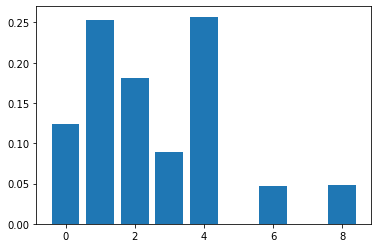

In [32]:
#plot
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
plt.show()